In [8]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [9]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [13]:
len(y_test)

10000

In [81]:
len(x_train)

60000

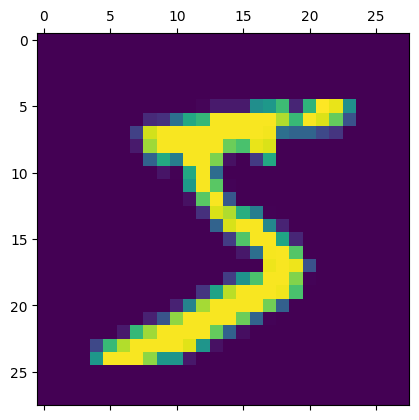

In [22]:
plt.matshow(x_train[0])

In [24]:
y_train[0:6]

array([5, 0, 4, 1, 9, 2], dtype=uint8)

In [43]:
x_train=x_train/255
x_test=x_test/255

In [44]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [45]:
x_test_flattened.shape

(10000, 784)

In [46]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4704 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3042 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2834 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2731 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9248


In [47]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2670 - accuracy: 0.9248


[0.26703888177871704, 0.9247999787330627]

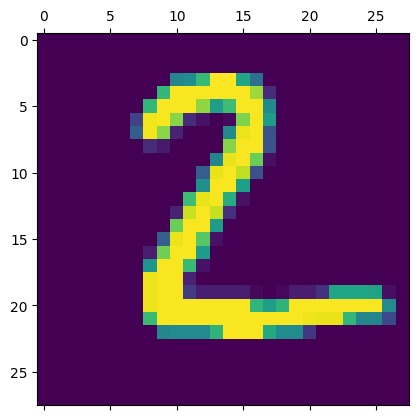

In [54]:
plt.matshow(x_test[1])

In [55]:
y_predicted=model.predict(x_test_flattened)

313/313 [==============================] - 0s 889us/step


In [56]:
y_predicted[1]

array([5.6946635e-01, 6.8575270e-03, 9.9917805e-01, 3.5797983e-01,
       6.9614009e-10, 8.0438823e-01, 8.1157422e-01, 9.5163807e-13,
       1.2968697e-01, 1.9933881e-09], dtype=float32)

In [57]:
np.argmax(y_predicted[1])

2

In [65]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [66]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [67]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [69]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    5,    4,    2,    1,    1],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   6,   11,  929,   17,    7,    2,   11,    8,   36,    5],
       [   4,    1,   22,  932,    0,   15,    2,    9,   17,    8],
       [   1,    2,    7,    1,  908,    0,    8,    5,    9,   41],
       [   9,    4,    6,   46,    8,  764,   10,    7,   31,    7],
       [  12,    3,    7,    1,    7,   13,  911,    2,    2,    0],
       [   1,   10,   24,    9,    5,    1,    0,  933,    1,   44],
       [   7,   15,    6,   29,    9,   25,    8,    8,  860,    7],
       [  10,    8,    1,   12,   20,    7,    0,   15,    6,  930]])>

In [71]:
import seaborn as sn

Text(95.72222222222221, 0.5, 'Truth')

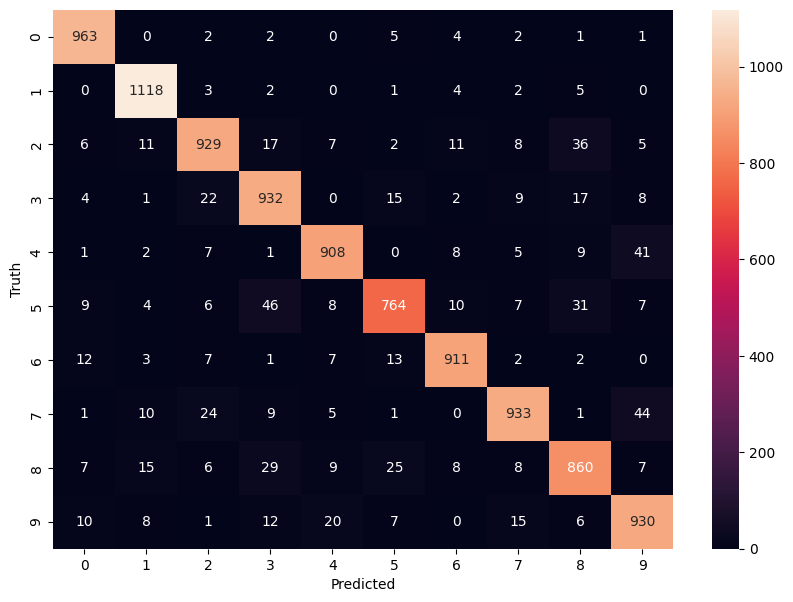

In [72]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [73]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2727 - accuracy: 0.9227
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1239 - accuracy: 0.9637
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0867 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0654 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0507 - accuracy: 0.9841


In [74]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0876 - accuracy: 0.9731


[0.0875684842467308, 0.9731000065803528]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

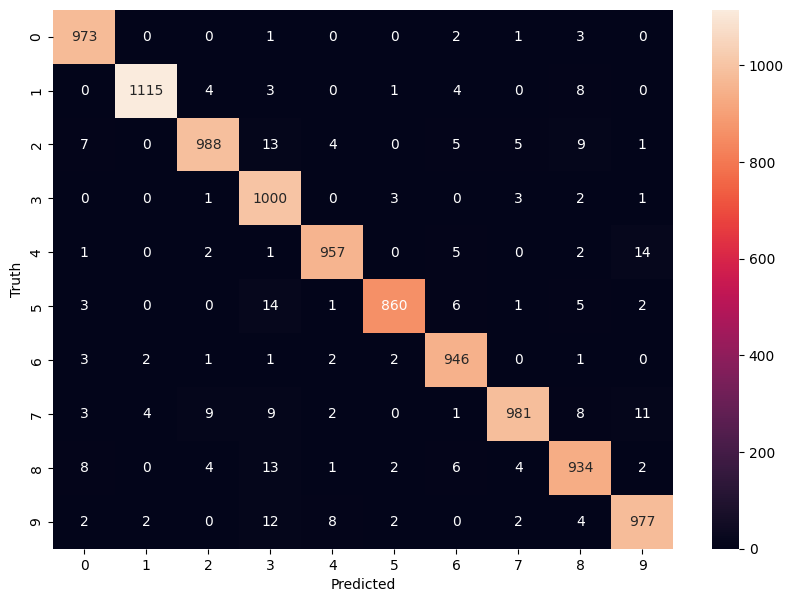

In [76]:
y_predicted=model.predict(x_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [82]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(3000,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1794 - accuracy: 0.9459
Epoch 2/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0794 - accuracy: 0.9758
Epoch 3/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0529 - accuracy: 0.9835
Epoch 4/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0415 - accuracy: 0.9868
Epoch 5/5
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0335 - accuracy: 0.9890


In [97]:
def numPrediction(ind):
    predicted_number=np.argmax(model.predict(x_test)[ind])
    actual_number=y_test[ind]
    return {"Predicted":predicted_number,"Actual":actual_number}
    

In [102]:
numPrediction(51)

313/313 [==============================] - 2s 5ms/step


{'Predicted': 3, 'Actual': 3}